In [5]:
import pandas as pd

In [13]:
# Read the file
file_path = r'C:\Users\Grace\Desktop\SP25\527\Project\label.csv'
data = pd.read_csv(file_path)

# Print the first few lines
print(data.head())

      video_id  clip_id                                               text  \
0  -3g5yACwYnA       10  Key is part of the people that we use to solve...   
1  -3g5yACwYnA       13  They've been able to find solutions or at leas...   
2  -3g5yACwYnA        3  We're a huge user of adhesives for our operati...   
3  -3g5yACwYnA        2  Key Polymer brings a technical aspect to our o...   
4  -3g5yACwYnA        4  Key brings those types of aspects to a busines...   

      label annotation   mode  label_T  label_A  label_V  
0  1.000000   Positive  train      NaN      NaN      NaN  
1  0.666667   Positive  train      NaN      NaN      NaN  
2  0.000000    Neutral  train      NaN      NaN      NaN  
3  0.000000    Neutral  train      NaN      NaN      NaN  
4  1.000000   Positive  train      NaN      NaN      NaN  


In [15]:
print(data.columns)

Index(['video_id', 'clip_id', 'text', 'label', 'annotation', 'mode', 'label_T',
       'label_A', 'label_V'],
      dtype='object')


In [17]:
# Display basic information about the dataset
print(data.info())
print(data.describe())
print(data['annotation'].value_counts())
print(data['video_id'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22856 entries, 0 to 22855
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   video_id    22856 non-null  object 
 1   clip_id     22856 non-null  int64  
 2   text        22856 non-null  object 
 3   label       22856 non-null  float64
 4   annotation  22856 non-null  object 
 5   mode        22856 non-null  object 
 6   label_T     0 non-null      float64
 7   label_A     0 non-null      float64
 8   label_V     0 non-null      float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB
None
            clip_id         label  label_T  label_A  label_V
count  22856.000000  22856.000000      0.0      0.0      0.0
mean       8.158777      0.148976      NaN      NaN      NaN
std        8.163996      1.114437      NaN      NaN      NaN
min        0.000000     -3.000000      NaN      NaN      NaN
25%        3.000000     -0.333333      NaN      NaN      NaN
50%     

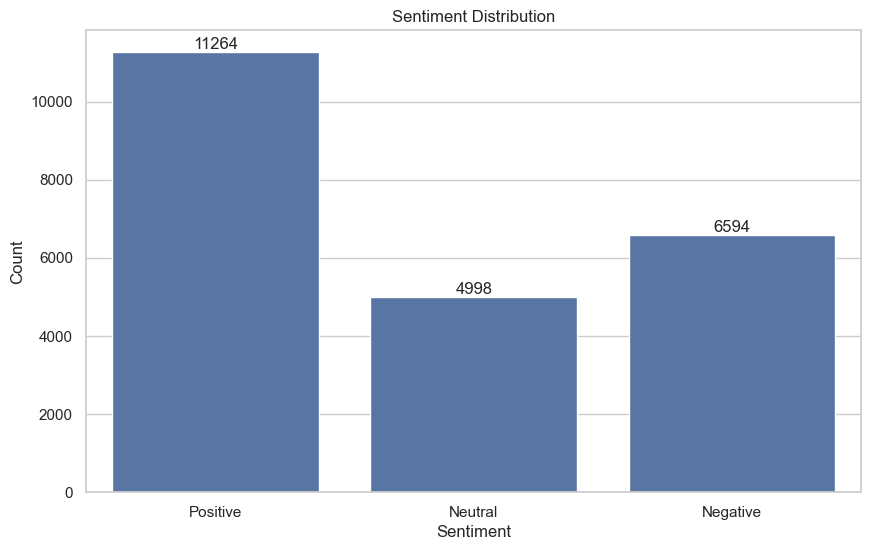

In [49]:
# Plot Sentiment distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='annotation')
plt.title('Sentiment Distribution')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [47]:
print(data['video_id'].value_counts().nlargest(20))

video_id
266396         98
266938         55
j1m6ctAgjsM    52
ogGweZUAVtU    52
264446         50
vM3YB7LmMq4    49
267466         47
271366         47
F59hwsm4Ld0    46
39lcRCFvV-s    45
261900         45
271594         42
276217         42
zhNksSReaQk    41
268836         40
259260         40
7ZzbemE4QEE    39
rojyUp4FPSg    39
238023         39
83859          38
Name: count, dtype: int64


In [75]:
# Get the top videos by the number of clipes
top_videos = data['video_id'].value_counts().nlargest(20).index

# Filter data for only the top videos
top_videos_data = data[data['video_id'].isin(top_videos)]

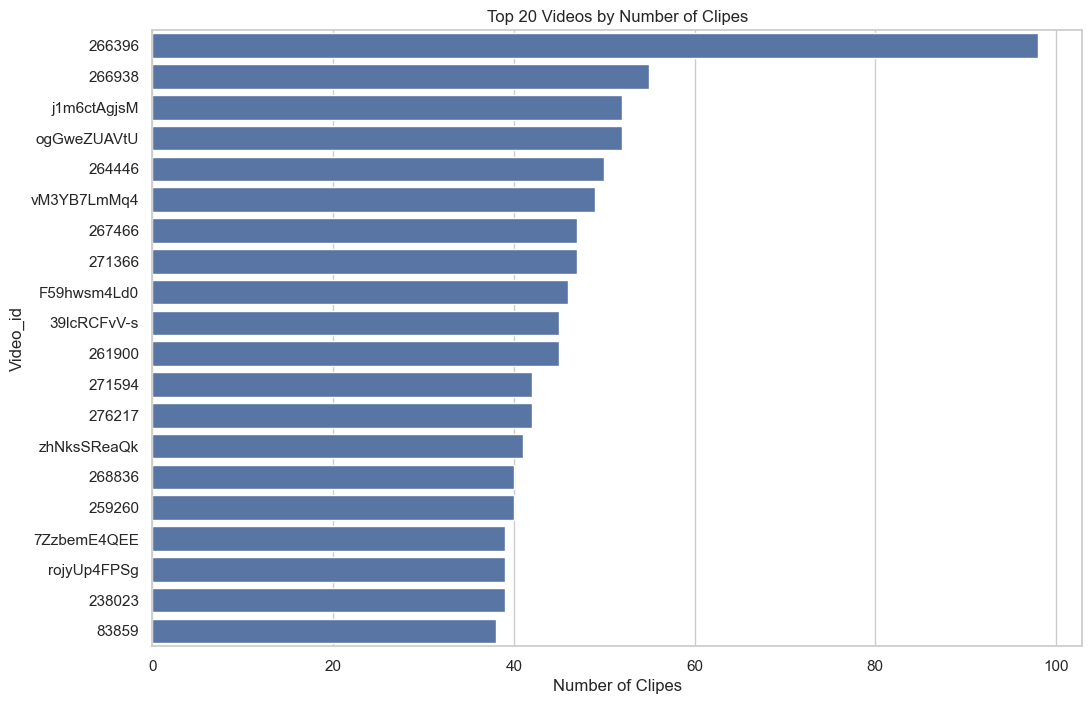

In [77]:
# Plot the number of clipes of each video_id
plt.figure(figsize=(12, 8))
sns.countplot(data=data[data['video_id'].isin(top_videos)], y='video_id', order=top_videos)
plt.title('Top 20 Videos by Number of Clipes')
plt.xlabel('Number of Clipes')
plt.ylabel('Video_id')
plt.show()

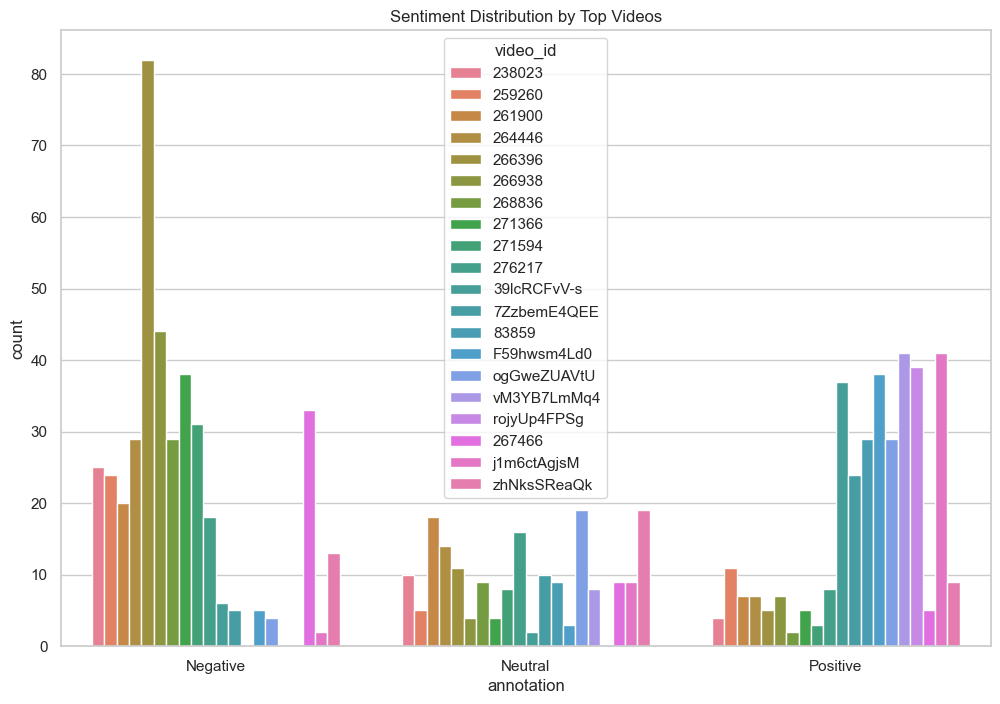

In [79]:
# Plot sentiment distribution for top videos
plt.figure(figsize=(12, 8))
sns.countplot(data=top_videos_data, x='annotation', hue='video_id')
plt.title('Sentiment Distribution by Top Videos')
plt.show()

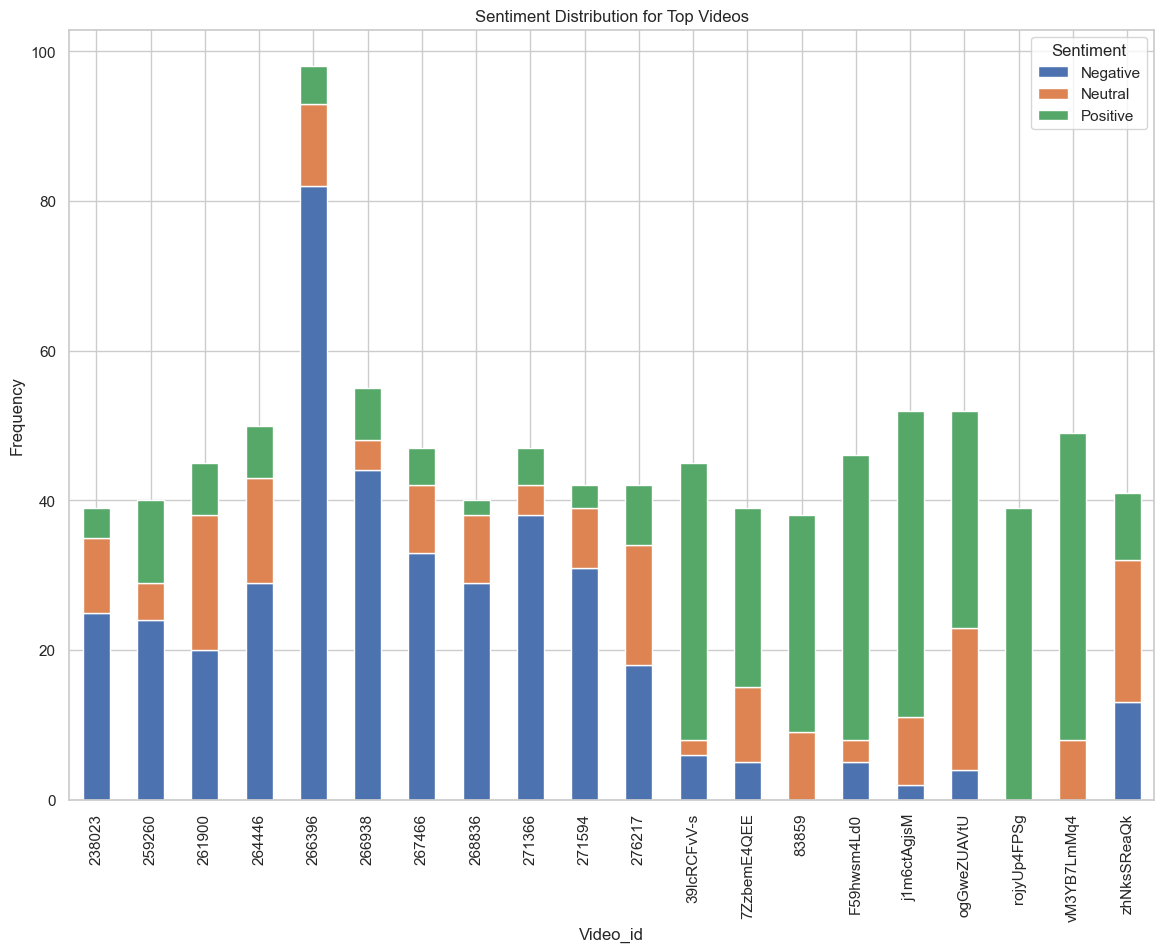

In [81]:
# Aggregating sentiment counts for top videos
video_sentiment = top_videos_data.groupby(['video_id', 'annotation']).size().unstack().fillna(0)

# Plot this data
video_sentiment.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Sentiment Distribution for Top Videos')
plt.xlabel('Top Video_id')
plt.ylabel('Frequency')
plt.legend(title='Sentiment')
plt.show()

<Figure size 1200x800 with 0 Axes>

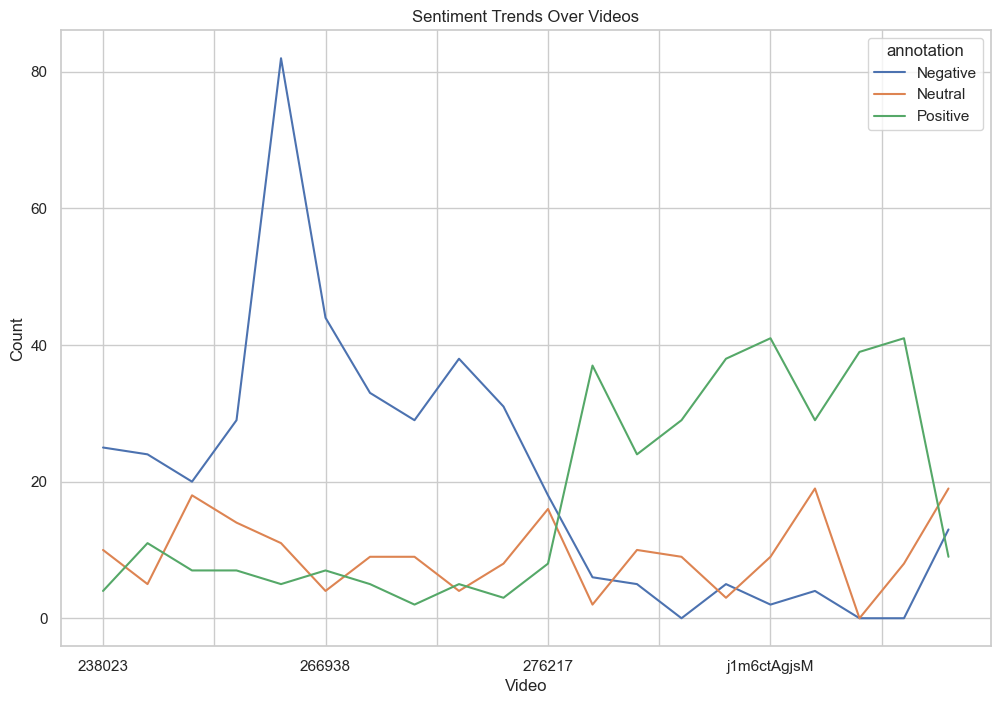

In [85]:
# Plot sentiment trends over the videos
plt.figure(figsize=(12, 8))
sentiment_counts = top_videos_data.groupby(['video_id', 'annotation']).size().unstack().fillna(0)
sentiment_counts.plot(kind='line', figsize=(12, 8))
plt.title('Sentiment Trends Over Videos')
plt.xlabel('Video_id')
plt.ylabel('Count')
plt.show()